In [4]:
!pip install qiskit==0.16.1

  Using cached qiskit-0.16.1.tar.gz (3.9 kB)
     |████████████████████████████████| 2.4 MB 9.6 MB/s eta 0:00:01     |███████▉                        | 583 kB 9.6 MB/s eta 0:00:01     |███████████████████             | 1.4 MB 9.6 MB/s eta 0:00:01
     |████████████████████████████████| 10.0 MB 13.7 MB/s eta 0:00:01    |▋                               | 204 kB 13.7 MB/s eta 0:00:01     |██▋                             | 819 kB 13.7 MB/s eta 0:00:01     |███▍                            | 1.0 MB 13.7 MB/s eta 0:00:01     |██████████                      | 3.1 MB 13.7 MB/s eta 0:00:01     |██████████████████▎             | 5.7 MB 13.7 MB/s eta 0:00:01     |████████████████████████████▌   | 8.9 MB 13.7 MB/s eta 0:00:01
  Using cached qiskit_ibmq_provider-0.5.0-py3-none-any.whl (140 kB)
  Using cached qiskit_ignis-0.2.0-py3-none-any.whl (100 kB)
  Using cached qiskit_aqua-0.6.4-py3-none-any.whl (1.8 MB)
  Using cached Cython-0.29.23-cp39-cp39-macosx_10_9_x86_64.whl (1.9 MB)
  Using cached py

In [5]:
# Task One : Fuandamentals of Qunatum Computation
# Concepts and Mathematical Prerequisite for Qunatum Computation

# Introduction
The prerequisites of these series of course include linear algebra, calculus, complex numbers, and intermediate-level Python. Nevertheless, it is worth gathering some core concepts in a single notebook as a refresher, and also to serve as a reference. The concepts in this notebook will be used over and over again in the course, so



# Hilbert Space
Hilbert space is named after David Hilbert, one of the greatest and most influential mathematician ever lived. Hilbert space is a generalisation of the Nth dimension starting from the fundamental axioms, Hilbert postulated that if zeroth dimension is a dot, and one dimension is a straight line between two dots forming the fist axis say x-axis, and two dimension is another perpendicularly straight line spanning a surface between the lines that forms another axis, the y-axis, then in 3D another 2D surface rises perpendicular and orthonormal forming a third z-axis, then fourth dimension could be formulated whit the same principle and so on. Hilbert formalized the notion of dimension to yield infinitely many dimensions for an infite case, and more practically the Nth dimension. 
The Euclidian space is a speciel case of $\mathcal{H}$


In [1]:
from sympy.physics.quantum.hilbert import HilbertSpace
hs = HilbertSpace()
hs

H

The Hilbert space of square integrable functions on an interval.

An L2 object takes in a single sympy Interval argument which represents the interval its functions (vectors) are defined on.

In [2]:
from sympy import Interval, oo
from sympy.physics.quantum.hilbert import L2
hs = L2(Interval(0,oo))
hs

L2(Interval(0, oo))

In [3]:
L2(Interval(0, oo))

L2(Interval(0, oo))

In [4]:
hs.dimension

oo

In [5]:
hs.interval

Interval(0, oo)

An exponentiated Hilbert space [R626].

Tensor powers (repeated tensor products) are represented by the operator ** Identical Hilbert spaces that are multiplied together will be automatically combined into a single tensor power object.

Any Hilbert space, product, or sum may be raised to a tensor power. The TensorPowerHilbertSpace takes two arguments: the Hilbert space; and the tensor power (number)


In [6]:
from sympy.physics.quantum.hilbert import ComplexSpace, FockSpace
from sympy import symbols

In [7]:
n = symbols('n')
c = ComplexSpace(2)
hs = c**n
hs


C(2)**n

In [8]:
hs.dimension

2**n

In [9]:
c = ComplexSpace(2)
c*c

C(2)**2

In [10]:
f = FockSpace()
c*f*f

C(2)*F**2

A tensor product of Hilbert spaces [R627].

The tensor product between Hilbert spaces is represented by the operator * Products of the same Hilbert space will be combined into tensor powers.

A TensorProductHilbertSpace object takes in an arbitrary number of HilbertSpace objects as its arguments. In addition, multiplication of HilbertSpace objects will automatically return this tensor product object.

In [11]:
from sympy.physics.quantum.hilbert import ComplexSpace, FockSpace
from sympy import symbols

In [12]:
c = ComplexSpace(2)
f = FockSpace()
hs = c*f
hs

C(2)*F

In [13]:
hs.dimension

oo

In [14]:
hs.spaces

(C(2), F)

In [15]:
c1 = ComplexSpace(2)
n = symbols('n')
c2 = ComplexSpace(n)
hs = c1*c2
hs

C(2)*C(n)

In [16]:
hs.dimension

2*n

## Anticmmutator
Evaluating an anticommutator is defined [R615] as: {A, B} = A*B + B*A. This class returns the anticommutator in an unevaluated form. To evaluate the anticommutator, use the .doit() method.

Canonical ordering of an anticommutator is {A, B} for A < B. The arguments of the anticommutator are put into canonical order using __cmp__. If B < A, then {A, B} is returned as {B, A}.



In [18]:
from sympy import symbols
from sympy.physics.quantum import AntiCommutator
from sympy.physics.quantum import Operator, Dagger
x, y = symbols('x,y')
A = Operator('A')
B = Operator('B')

In [19]:
ac = AntiCommutator(A,B); ac

{A,B}

In [20]:
ac.doit()

A*B + B*A

In [21]:
ac = AntiCommutator(B,A); ac

{A,B}

In [22]:
AntiCommutator(3*x*A,x*y*B)

3*x**2*y*{A,B}

In [23]:
Dagger(AntiCommutator(A,B))

{Dagger(A),Dagger(B)}

## commutator
Evaluating a commutator is defined [R619] as: [A, B] = A*B - B*A. This class returns the commutator in an unevaluated form. To evaluate the commutator, use the .doit() method.

Canonical ordering of a commutator is [A, B] for A < B. The arguments of the commutator are put into canonical order using __cmp__. If B < A, then [B, A] is returned as -[A, B].

In [24]:
from sympy.physics.quantum import Commutator, Dagger, Operator
from sympy.abc import x, y
A = Operator('A')
B = Operator('B')
C = Operator('C')

In [25]:
comm = Commutator(A, B)
comm

[A,B]

In [26]:
comm.doit()

A*B - B*A

In [27]:
comm = Commutator(B, A); comm

-[A,B]

In [28]:
comm = Commutator(B, A); comm

-[A,B]

In [29]:
Commutator(3*x*A, x*y*B)

3*x**2*y*[A,B]

In [30]:
Commutator(A+B, C).expand(commutator=True)

[A,C] + [B,C]

In [31]:
Commutator(A, B+C).expand(commutator=True)

[A,B] + [A,C]

In [32]:
Commutator(A*B, C).expand(commutator=True)

[A,C]*B + A*[B,C]

In [33]:
Commutator(A, B*C).expand(commutator=True)

[A,B]*C + B*[A,C]

In [34]:
Dagger(Commutator(A, B))

-[Dagger(A),Dagger(B)]

### Inner Product
An unevaluated inner product between a Bra and a Ket [1].

Parameters
bra : BraBase or subclass
The bra on the left side of the inner product.
ket : KetBase or subclass
The ket on the right side of the inner product.


In [35]:
from sympy.physics.quantum import Bra, Ket
b = Bra('b')
k = Ket('k')
ip = b*k
ip

<b|k>

In [36]:
ip.bra

<b|

In [37]:
ip.ket

|k>

In [38]:
b*k

<b|k>

In [39]:
k*b*k*b

|k><b|*|k>*<b|

In [40]:
k*(b*k)*b

<b|k>*|k>*<b|

## TensorProduct

class sympy.physics.quantum.tensorproduct.TensorProduct(*args)[source]
The tensor product of two or more arguments.

For matrices, this uses matrix_tensor_product to compute the Kronecker or tensor product matrix. For other objects a symbolic TensorProduct instance is returned. The tensor product is a non-commutative multiplication that is used primarily with operators and states in quantum mechanics.

Currently, the tensor product distinguishes between commutative and non-commutative arguments. Commutative arguments are assumed to be scalars and are pulled out in front of the TensorProduct. Non-commutative arguments remain in the resulting TensorProduct.

In [41]:
from sympy import Matrix
from sympy.physics.quantum import TensorProduct
m1 = Matrix([[1,2],[3,4]])
m2 = Matrix([[1,0],[0,1]])
TensorProduct(m1, m2)

Matrix([
[1, 0, 2, 0],
[0, 1, 0, 2],
[3, 0, 4, 0],
[0, 3, 0, 4]])

In [44]:
TensorProduct(m2, m1)

Matrix([
[1, 2, 0, 0],
[3, 4, 0, 0],
[0, 0, 1, 2],
[0, 0, 3, 4]])

In [45]:
from sympy import Symbol
A = Symbol('A',commutative=False)
B = Symbol('B',commutative=False)
tp = TensorProduct(A, B)
tp

AxB

In [46]:
from sympy.physics.quantum import Dagger
Dagger(tp)

Dagger(A)xDagger(B)

In [47]:
from sympy import symbols
a, b, c, d, e, f, g, h = symbols("a, b, c, d, e, f, g, h")

In [48]:
from sympy import Matrix
from sympy.physics.quantum import TensorProduct
m1 = Matrix([[a, b],[c, d]])
m2 = Matrix([[e, f],[g, h]])
TensorProduct(m1, m2)

Matrix([
[a*e, a*f, b*e, b*f],
[a*g, a*h, b*g, b*h],
[c*e, c*f, d*e, d*f],
[c*g, c*h, d*g, d*h]])

Try to simplify and combine TensorProducts.

In general this will try to pull expressions inside of TensorProducts. It currently only works for relatively simple cases where the products have only scalars, raw TensorProducts, not Add, Pow, Commutators of TensorProducts. It is best to see what it does by showing examples.

In [49]:
from sympy.physics.quantum import tensor_product_simp
from sympy.physics.quantum import TensorProduct
from sympy import Symbol
A = Symbol('A',commutative=False)
B = Symbol('B',commutative=False)
C = Symbol('C',commutative=False)
D = Symbol('D',commutative=False)

In [50]:
e = TensorProduct(A,B)*TensorProduct(C,D)
e

AxB*CxD

In [51]:
tensor_product_simp(e)

(A*C)x(B*D)

# Complex numbers
Using complex numbers in machine learning is rare, but in quantum mechanics, all spaces use complex numbers. The difference is that a complex number has an imaginary component: a part that is a multiple of $i=\sqrt{-1}$. Complex numbers are very much an algebraic construct: technically speaking, they are [algebraically closed](https://en.wikipedia.org/wiki/Fundamental_theorem_of_algebra), whereas the real numbers are not. From our perspective, what matters is that they enable us to model effects like interference. We denote the set of complex numbers by $\mathbb{C}$.

The imaginary number $i$ in Python is denoted by `1j`. We can quickly check that it indeed squares to -1:

In [52]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)
π = np.pi

In [53]:
a = np.arange(5) + 1j*np.arange(6,11);
a

array([0. +6.j, 1. +7.j, 2. +8.j, 3. +9.j, 4.+10.j])

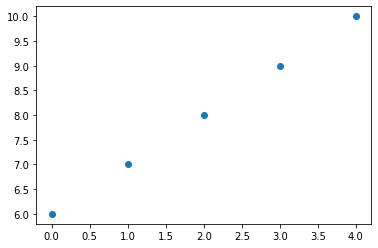

In [54]:
plt.fig,ax = plt.subplots()
ax.scatter(a.real,a.imag)

In [55]:
def argand(a):
    import matplotlib.pyplot as plt
    import numpy as np
    for x in range(len(a)):
        plt.plot([0,a[x].real],[0,a[x].imag],'ro-',label='python')
    limit=np.max(np.ceil(np.absolute(a))) # set limits for axis
    plt.xlim((-limit,limit))
    plt.ylim((-limit,limit))
    plt.ylabel('Imaginary')
    plt.xlabel('Real')
    plt.show()

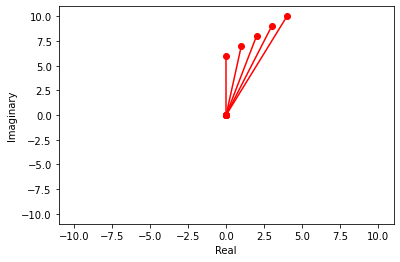

In [56]:
a = np.arange(5) + 1j*np.arange(6,11)
argand(a)
#from argand import argand


## Basic Arithmatic Operations & Complex Numbers

In [57]:
5+9

14

In [58]:
12*4

48

Complex numbers are always of the form

\begin{align}
\alpha = a + bi
\end{align}


In [59]:
1j * 1j

(-1+0j)

In [60]:
z = 3 + 4j
w = 1 - 2j

In [61]:
print('z=', z)
print('Real(z)=', np.real(z))
print('Imag(z)=', np.imag(z))

z= (3+4j)
Real(z)= 3.0
Imag(z)= 4.0


In [62]:
z+w

(4+2j)

In [63]:
z-w

(2+6j)

In [64]:
z/w

(-1+2j)

## Complex conjugate

In [65]:
z

(3+4j)

In [66]:
np.conj(z)

(3-4j)

## Norms/Absolute Values



\begin{align} ||z|| &= \sqrt{zz^*} = \sqrt{|z|^2},\\ ||w|| &= \sqrt{ww^*} = \sqrt{|w|^2}, \end{align} 

In [67]:
print('||z||=', np.abs(z))

||z||= 5.0


In [68]:
print('||w||=', np.abs(w))

||w||= 2.23606797749979


## Row Vectors, Column Vectors, and Bra-Ket Notation

\begin{align} \text{Column Vector:} \ \begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_n
\end{pmatrix} 
\quad \quad \text{Row Vector:} \ \begin{pmatrix}
a_1, & a_2, & \cdots, & a_n
\end{pmatrix} \end{align}



In [69]:
# Create a vector as a row
row_vector = np.array([2-1j, 7j, -3])

# Create a vector as a column
column_vector = np.array([[2+1j],
                          [-5],
                          [2j]])

In [70]:
row_vector

array([ 2.-1.j,  0.+7.j, -3.+0.j])

Row vectors in quantum mechanics are also called **bra-vectors**, and are denoted as follows:

\begin{align} \langle A| = \begin{pmatrix}
a_1, & a_2, \cdots, & a_n
\end{pmatrix} \end{align}

Column vectors are also called **ket-vectors** in quantum mechanics denoted as follows:

\begin{align} |B\rangle = \begin{pmatrix}
b_1 \\ b_2 \\ \vdots \\ b_n
\end{pmatrix} \end{align}

In general, if we have a column vector, i.e. a ket-vector:

\begin{align} |A\rangle = \begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_n
\end{pmatrix} \end{align}

the corresponding bra-vector:

\begin{align} \langle A| = \begin{pmatrix}
a_1^*, & a_2^*, & \cdots, & a_n^*
\end{pmatrix} \end{align}


In [71]:
ket_A = np.array([[2-1j],
                  [5]])
ket_B = np.array([[7], 
                  [-3j]])

In [72]:
print(ket_A + ket_B)

[[9.-1.j]
 [5.-3.j]]


## Inner Product

\begin{align} \langle A| = \begin{pmatrix}
a_1, & a_2, & \cdots, & a_n
\end{pmatrix}, \quad \quad
|B\rangle = \begin{pmatrix}
b_1 \\ b_2 \\ \vdots \\ b_n
\end{pmatrix} \end{align}

Taking the inner product of $\langle A|$ and $|B\rangle$ gives the following:

\begin{align} \langle A| B \rangle &= \begin{pmatrix} 
a_1, & a_2, & \cdots, & a_n
\end{pmatrix}
\begin{pmatrix}
b_1 \\ b_2 \\ \vdots \\ b_n
\end{pmatrix}\\
&= 
a_1b_1 + a_2b_2 + \cdots + a_nb_n\\
&= \sum_{i=1}^n a_ib_i
\end{align}

In [73]:
# Define the 4x1 matrix version of a column vector (instead of using the np.array() version):
A = np.matrix([[1-1j], 
               [3], 
               [2j], 
               [5+1j]])
A

matrix([[1.-1.j],
        [3.+0.j],
        [0.+2.j],
        [5.+1.j]])

In [74]:
# Define B as a 1x4 matrix
B = np.matrix([[-3j, 2+2j, -6j, -7]])

B

matrix([[-0.-3.j,  2.+2.j, -0.-6.j, -7.+0.j]])

In [75]:
# Compute <B|A>
np.dot(B,A)

matrix([[-20.-4.j]])

## Matrices


\begin{align}
M = \begin{pmatrix}
2-i & -3 \\
-5i & 2
\end{pmatrix}
\end{align}

In [76]:
M = np.array([[2-1j, -3],
              [-5j, 2]])

print(M)

[[ 2.-1.j -3.+0.j]
 [-0.-5.j  2.+0.j]]


In [77]:
M = np.matrix([[2-1j, -3],
               [-5j, 2]])

print(M)

[[ 2.-1.j -3.+0.j]
 [-0.-5.j  2.+0.j]]


Hermitian conjugates are given by taking the conjugate transpose of the matrix

In [78]:
print(M.H)

[[ 2.+1.j -0.+5.j]
 [-3.-0.j  2.-0.j]]


## Tensor Products of Matrices

\begin{align}
\begin{pmatrix}
a & b \\
c & d
\end{pmatrix} \otimes 
\begin{pmatrix}
x & y \\
z & w
\end{pmatrix} = 
\begin{pmatrix}
a \begin{pmatrix}
x & y \\
z & w
\end{pmatrix} & b \begin{pmatrix}
x & y \\
z & w
\end{pmatrix} \\
c \begin{pmatrix}
x & y \\
z & w
\end{pmatrix} & d \begin{pmatrix}
x & y \\
z & w
\end{pmatrix}
\end{pmatrix} = 
\begin{pmatrix}
ax & ay & bx & by \\
az & aw & bz & bw \\
cx & cy & dx & dy \\
cz & cw & dz & dw
\end{pmatrix}
\end{align}

In [84]:
A = np.matrix([[1j+8 , 2j-6], []])












# Task Two: Qubits, Bloch Sphere and Basis States

In [1]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.21.1', 'qiskit-aer': '0.10.4', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.19.2', 'qiskit': '0.37.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}



\begin{align}
|\psi \rangle = \begin{pmatrix}
\alpha \\ \beta
\end{pmatrix}, \quad \text{where } \sqrt{\langle \psi | \psi \rangle} = 1. 
\end{align}

Think of Qubit as an Electron:

\begin{align}
\text{spin-up}: \ |0\rangle &= \begin{pmatrix} 1\\0 \end{pmatrix} \\
\text{spin-down}: \ |1\rangle & = \begin{pmatrix} 0\\1 \end{pmatrix}
\end{align}

In [2]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_bloch_vector
%matplotlib inline

Another representation is via Bloch Sphere:

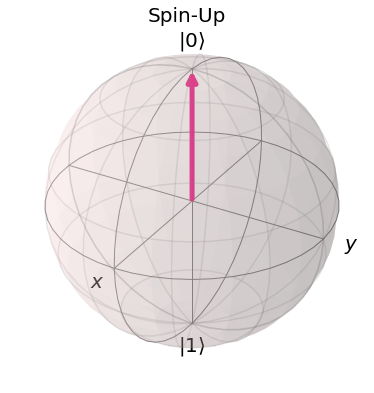

In [3]:
plot_bloch_vector([0,0,1], title="Spin-Up")

## Spin + / - :

\begin{align}
\text{spin +}: \ |+\rangle &= \begin{pmatrix} 1/\sqrt{2} \\ 1/\sqrt{2} \end{pmatrix} = \frac{1}{\sqrt{2}} \left(|0\rangle + |1\rangle\right) \\
\text{spin -}: \ |-\rangle & = \begin{pmatrix} 1/\sqrt{2} \\ -1/\sqrt{2} \end{pmatrix} = \frac{1}{\sqrt{2}} \left(|0\rangle - |1\rangle\right)
\end{align}

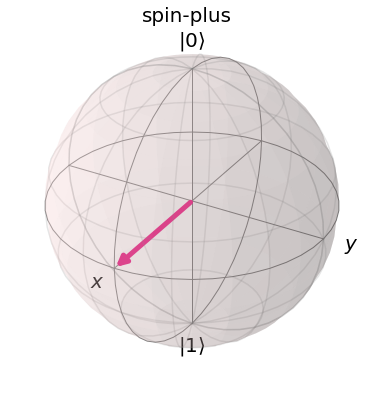

In [4]:
plot_bloch_vector([1,0,0], title="spin-plus")

## Basis States


\begin{align}
 |0\rangle &= \begin{pmatrix} 1\\0 \end{pmatrix} \\
 |1\rangle & = \begin{pmatrix} 0\\1 \end{pmatrix}
\end{align}
Preapring other states from Basis States:
\begin{align}
|00 \rangle &= |0\rangle \otimes |0\rangle = \begin{pmatrix} 1\\0 \end{pmatrix} \otimes \begin{pmatrix} 1\\0 \end{pmatrix} = \begin{pmatrix} 1\\0\\0\\0 \end{pmatrix} \\
|01 \rangle &= |0\rangle \otimes |1\rangle = \begin{pmatrix} 1\\0 \end{pmatrix} \otimes \begin{pmatrix} 0\\1 \end{pmatrix} = \begin{pmatrix} 0\\1\\0\\0 \end{pmatrix} \\
|10 \rangle &= |1\rangle \otimes |0\rangle = \begin{pmatrix} 0\\1 \end{pmatrix} \otimes \begin{pmatrix} 1\\0 \end{pmatrix} = \begin{pmatrix} 0\\0\\1\\0 \end{pmatrix} \\
|11 \rangle &= |1\rangle \otimes |1\rangle = \begin{pmatrix} 0\\1 \end{pmatrix} \otimes \begin{pmatrix} 0\\1 \end{pmatrix} = \begin{pmatrix} 0\\0\\0\\1 \end{pmatrix}
\end{align}

In [5]:
qubit1_state = np.matrix([[1],[0]]) 
qubit2_state = np.matrix([[0],[1]])

two_qubit_state =np.kron(qubit1_state, qubit2_state)

# Task Three: Qunatum Gates and Circuits

In [6]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector

## Pauli Matrices

\begin{align}
I = \begin{pmatrix} 1&0 \\ 0&1 \end{pmatrix}, \quad
X = \begin{pmatrix} 0&1 \\ 1&0 \end{pmatrix}, \quad
Y = \begin{pmatrix} 0&i \\ -i&0 \end{pmatrix}, \quad
Z = \begin{pmatrix} 1&0 \\ 0&-1 \end{pmatrix} \quad
\end{align}

## X-gate

The X-gate is represented by the Pauli-X matrix:

$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = |0\rangle\langle1| + |1\rangle\langle0| $$

Effect a gate has on a qubit: 

$$ X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle$$


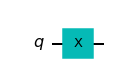

In [7]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

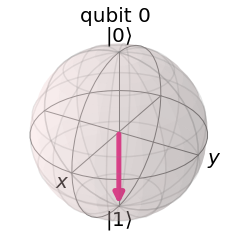

In [9]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

## Z & Y-Gate



$$ Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \quad\quad\quad\quad Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} $$

$$ Y = -i|0\rangle\langle1| + i|1\rangle\langle0| \quad\quad Z = |0\rangle\langle0| - |1\rangle\langle1| $$




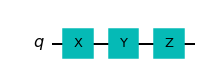

In [10]:
qc.y(0) # Do Y-gate on qubit 0
qc.z(0) # Do Z-gate on qubit 0
qc.draw('mpl')

## Hadamard Gate



$$ H = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$

We can see that this performs the transformations below:

$$ H|0\rangle = |+\rangle $$

$$ H|1\rangle = |-\rangle $$

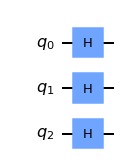

In [11]:
qc = QuantumCircuit(3)
# Apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)
# See the circuit:
qc.draw('mpl')

## Identity Gate



$$
I = \begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix}
$$



$$ I = XX $$



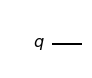

In [12]:
qc = QuantumCircuit(1)
#qc.i(0)
qc.draw('mpl')

 ** Other Gates: S-gate , T-gate, U-gate

## Multiple Qubits, Entanglement

## Multiple Qubits

The state of two qubits :

$$ |psi\rangle = a_{00}|00\rangle + a_{01}|01\rangle + a_{10}|10\rangle + a_{11}|11\rangle = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{bmatrix} $$

In [13]:
from qiskit import * 

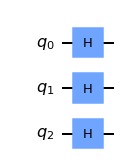

In [14]:
qc = QuantumCircuit(3)

for qubit in range(3):
    qc.h(qubit)

qc.draw('mpl')

Each qubit is in the state $|+\rangle$, so we should see the vector:

$$ 
|{+++}\rangle = \frac{1}{\sqrt{8}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \\
                              1 \\ 1 \\ 1 \\ 1 \\
              \end{bmatrix}
$$

In [15]:
backend = Aer.get_backend('statevector_simulator')
final_state= execute(qc, backend).result().get_statevector()
print(final_state)

Statevector([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j],
            dims=(2, 2, 2))


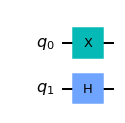

In [16]:
qc = QuantumCircuit(2)

qc.x(0)
qc.h(1)

qc.draw('mpl')



$$
X|q_1\rangle \otimes H|q_0\rangle = (X\otimes H)|q_1 q_0\rangle
$$

The operation looks like this:

$$
X\otimes H = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \otimes \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = \frac{1}{\sqrt{2}}
\begin{bmatrix} 0 & 0 & 1 & 1 \\
                0 & 0 & 1 & -1 \\
                1 & 1 & 0 & 0 \\
                1 & -1 & 0 & 0 \\
\end{bmatrix}
$$

Which we can then apply to our 4D statevector $|q_1 q_0\rangle$. You will often see the clearer notation:

$$
X\otimes H = 
\begin{bmatrix} 0 & H \\
               H & 0\\
\end{bmatrix}
$$

## C-Not Gate

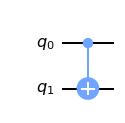

In [17]:
qc = QuantumCircuit(2)

qc.cx(0, 1)

qc.draw('mpl')



Classical truth table of C-Not gate:

| Input (t,c) | Output (t,c) |
|:-----------:|:------------:|
| 00          | 00           |
| 01          | 11           |
| 10          | 10           |
| 11          | 01           |



## Entanglement

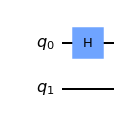

In [18]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
qc.draw('mpl')

In [19]:
# Let's see the result:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
print(final_state)

Statevector([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j],
            dims=(2, 2))


Quantum System Sate is:

$$
|0{+}\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |01\rangle)
$$


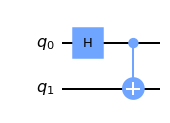

In [20]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
qc.draw('mpl')

In [21]:
# Let's see the result:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
print(final_state)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


We see we have this final state (Bell State):

$$
\text{CNOT}|0{+}\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$ 





```
# This is formatted as code
```

Other Bell States:

#Mo Quantum tunelling
1_4:
"The transverse field Ising model is critically important to explain how quantum annealing works because by adding the  𝜎𝑋  part to the Hamiltonian it becomes possible to exploit quantum effects like tunnelling. It is also important for understanding the quantum approximation optimization algorithms, since it was inspired by quantum annealing."

## Bernstein-Vazirani Algorithm


A black-box function $f$, which takes as input a string of bits ($x$), and returns either $0$ or $1$, that is:

$$f(\{x_0,x_1,x_2,...\}) \rightarrow 0 \textrm{ or } 1 \textrm{ where } x_n \textrm{ is }0 \textrm{ or } 1  $$ 

The function is guaranteed to return the bitwise product of the input with some string, $s$. 


In other words, given an input $x$, $f(x) = s \cdot x \, \text{(mod 2)} =\ x_0 * s_0+x_1*s_1+x_2*s_2+...\ $ mod 2

# Classical-solution:
    
|Input(x)|
|:-----:|
|100...0|
|010...0|
|001...0|
|000...1|

Where each query reveals a different bit of $s$ (the bit $s_i$)

# The quantum Bernstein-Vazirani Oracle:
    
1. Initialise the inputs qubits to the $|0\rangle^{\otimes n}$ state, and output qubit to $|{-}\rangle$.
2. Apply Hadamard gates to the input register
3. Query the oracle
4. Apply Hadamard gates to the input register
5. Measure

## Example Two Qubits:

<ol>
    <li> The register of two qubits is initialized to zero:
    

$$\lvert \psi_0 \rangle = \lvert 0 0 \rangle$$

 
   </li>

   <li> Apply a Hadamard gate to both qubits:
    

$$\lvert \psi_1 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle + \lvert 0 1 \rangle + \lvert 1 0 \rangle + \lvert 1 1 \rangle \right) $$

 
   </li>

   <li> For the string $s=11$, the quantum oracle performs the operation:
$$
|x \rangle \xrightarrow{f_s} (-1)^{x\cdot 11} |x \rangle. 
$$

$$\lvert \psi_2 \rangle = \frac{1}{2} \left( (-1)^{00\cdot 11}|00\rangle + (-1)^{01\cdot 11}|01\rangle + (-1)^{10\cdot 11}|10\rangle + (-1)^{11\cdot 11}|11\rangle \right)$$

$$\lvert \psi_2 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle - \lvert 0 1 \rangle - \lvert 1 0 \rangle + \lvert 1 1 \rangle \right)$$

 
   </li>

   <li> Apply a Hadamard gate to both qubits:
    

$$\lvert \psi_3 \rangle = \lvert 1 1 \rangle$$

 
   </li>

   <li> Measure to find the secret string $s=11$
   </li>


</ol>


In [22]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [23]:
secret_num = '101001'

In [24]:
circuit = QuantumCircuit(6+1,6)
circuit.h([0,1,2,3,4,5])

circuit.x(6)
circuit.h(6)

circuit.barrier()


circuit.cx(5,6)
circuit.cx(3,6)
circuit.cx(0,6)

circuit.barrier()
circuit.h([0,1,2,3,4,5])

circuit.measure([0,1,2,3,4,5],[0,1,2,3,4,5])

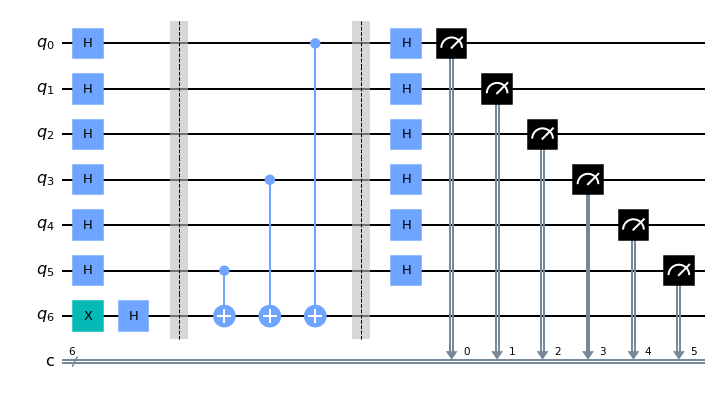

In [25]:
circuit.draw(output= 'mpl')

In [26]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend= simulator, shots = 1).result()
counts= result.get_counts()
print(counts)

{'101001': 1}
